TensorFlow version: 2.18.0
NumPy version: 1.26.0
Pandas version: 2.1.1
Found 31500 images belonging to 45 classes.
Found 31500 images belonging to 45 classes.
Found 13500 images belonging to 45 classes.
Found 31500 images belonging to 45 classes.
Found 31500 images belonging to 45 classes.
Found 31500 images belonging to 45 classes.


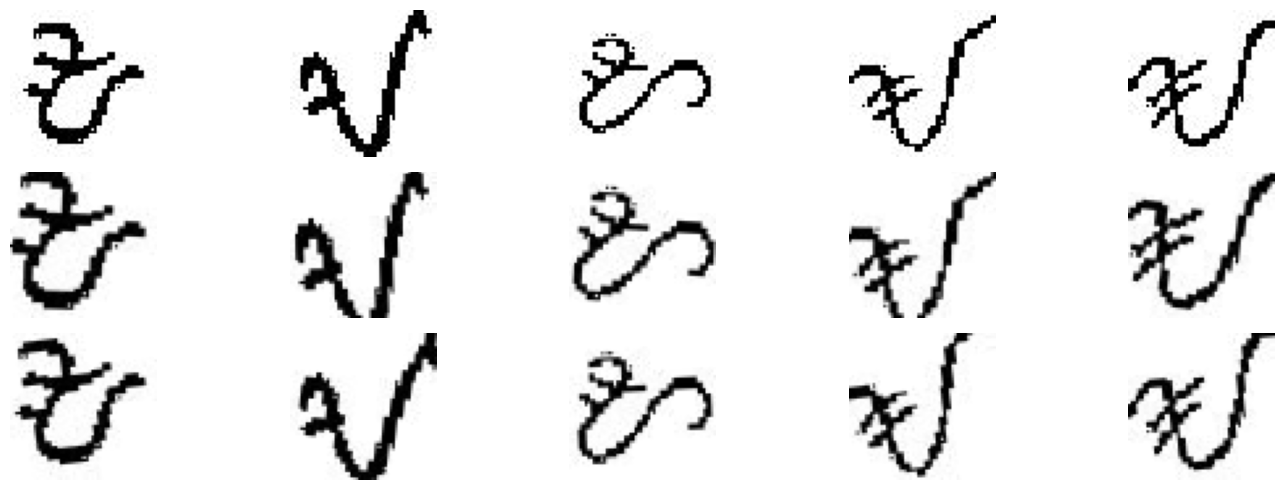

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │         5,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,786,157 (56.40 MB)

 Trainable params: 7,150,893 (27.28 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

None
Epoch 1/3
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 870s 441ms/step - accuracy: 0.7287 - loss: 1.0054 - val_accuracy: 0.9673 - val_loss: 0.1237
Epoch 2/3
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 948s 481ms/step - accuracy: 0.9694 - loss: 0.1168 - val_accuracy: 0.9695 - val_loss: 0.1109
Epoch 3/3
1968/1968 ━━━━━━━━━━━━━━━━━━━━ 905s 460ms/step - accuracy: 0.9805 - loss: 0.0768 - val_accuracy: 0.9769 - val_loss: 0.0951


Model saved as baybayin_vgg16_5.h5


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)

train_path = "./preprocessed_dataset_adaptive_3_split/train"
val_path = "./preprocessed_dataset_adaptive_3_split/val"

augmentation_params = {
    'rotation_range':8,
    'shear_range':0.05,
    'zoom_range':[0.85, 1.0],
    'width_shift_range':0.05,
    'height_shift_range':0.05,
    'fill_mode':'nearest'
}
train_datagen1 = ImageDataGenerator(rescale=1./255, **augmentation_params)
train_datagen2 = ImageDataGenerator(rescale=1./255, **augmentation_params)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator1 = train_datagen1.flow_from_directory(
    train_path,
    target_size=(56, 56),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale',
    seed=42
)

train_generator2 = train_datagen2.flow_from_directory(
    train_path,
    target_size=(56, 56),
    batch_size=16,
    class_mode='categorical',
    color_mode='grayscale',
    seed=24
)

def combined_generator(gen1, gen2):
    while True:
        x1, y1 = next(gen1)
        x2, y2 = next(gen2)
        x_combined = np.concatenate([x1, x2], axis=0)
        y_combined = np.concatenate([y1, y2], axis=0)
        yield x_combined, y_combined

train_combined = combined_generator(train_generator1, train_generator2)

validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(56, 56),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'  
)

sample_original_datagen = ImageDataGenerator(rescale=1./255)
sample_augmented_datagen1 = ImageDataGenerator(rescale=1./255, **augmentation_params)
sample_augmented_datagen2 = ImageDataGenerator(rescale=1./255, **augmentation_params)

sample_original_generator = sample_original_datagen.flow_from_directory(
    train_path,
    target_size=(56, 56),
    batch_size=5,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    seed=42
)

sample_augmented_generator1 = sample_augmented_datagen1.flow_from_directory(
    train_path,
    target_size=(56, 56),
    batch_size=5,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    seed=42
)

sample_augmented_generator2 = sample_augmented_datagen2.flow_from_directory(
    train_path,
    target_size=(56, 56),
    batch_size=5,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    seed=24
)

original_images, _ = next(sample_original_generator)
augmented_images1, _ = next(sample_augmented_generator1)
augmented_images2, _ = next(sample_augmented_generator2)

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(3, 5, i+1)
    plt.imshow(original_images[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(3, 5, i+6)
    plt.imshow(augmented_images1[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(3, 5, i+11)
    plt.imshow(augmented_images2[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

def grayscale_to_rgb(generator):
    for batch in generator:
        images, labels = batch
        images_rgb = np.repeat(images, 3, axis=-1)
        yield images_rgb, labels

train_generator_rgb = grayscale_to_rgb(train_combined)
val_generator_rgb = grayscale_to_rgb(validation_generator)

base_model = VGG16(
    weights='imagenet', 
    include_top=False, 
    input_shape=(56, 56, 3) 
)

for layer in base_model.layers[:15]:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(45, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

steps_per_epoch = (train_generator1.samples * 2) // 32
validation_steps = len(validation_generator)

history = model.fit(
    train_generator_rgb,
    validation_data=val_generator_rgb,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=3
)

model.save("baybayin_vgg16_5.h5")
print("Model saved as baybayin_vgg16_5.h5")

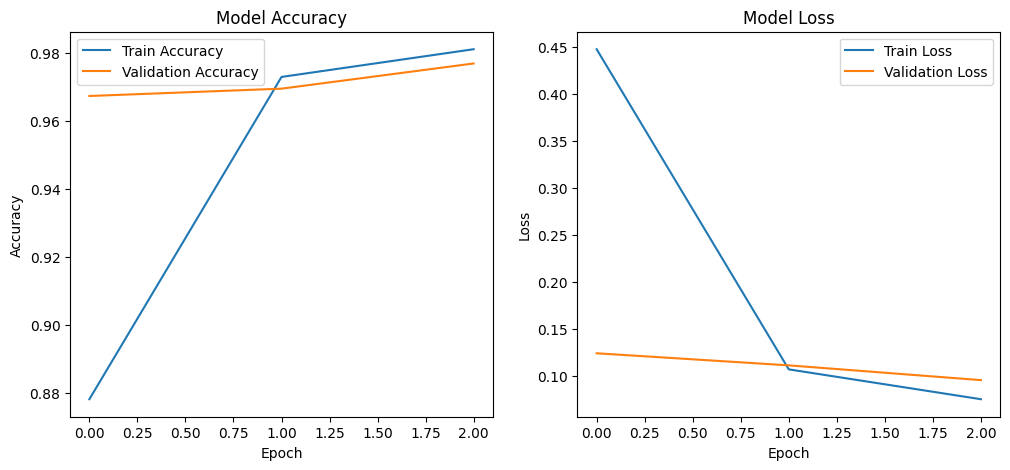

In [2]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

plot_history(history)
